In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, roc_auc_score
from sklearn.model_selection import KFold, GridSearchCV

Creating the Datasets

In [2]:
train_path="final_symbols_with_split/train"
test_path="final_symbols_with_split/test"
 
def create_dataset(path):
    data = []
    label_name = {'add': 10, 'divide': 1, 'eight': 8, 'five': 5, 'four': 4,
                  'multiply': 11, 'nine': 9, 'one': 1, 'seven': 7, 'six': 6,
                  'subtract': 12, 'three': 3, 'two': 2, 'zero': 13}

    for subfolder in os.listdir(path):
        print(subfolder)
        for filename in os.listdir(path + '/' + subfolder):

            listy = []
            #print(os.path.join(path + '/' + subfolder, filename))
            
            img = cv2.imread(os.path.join(path + '/' + subfolder, filename), 0)
            img_arr = cv2.resize(img,(28,28))
            listy.append(label_name[subfolder])
            listy.extend(img_arr.flatten().astype(int))
            data.append(listy)
                                      
    df = pd.DataFrame(data)
    return df

# find . -name '*.DS_Store' -type f -delete

In [3]:
train  = create_dataset(train_path)

eight
subtract
multiply
nine
divide
three
add
one
zero
seven
two
six
five
four


In [4]:
test = create_dataset(test_path)

eight
subtract
multiply
nine
divide
three
add
one
zero
seven
two
six
five
four


In [5]:
#Train X_tr
X_tr = train.iloc[:,1:] # iloc ensures X_tr will be a dataframe
X_tr =  X_tr/255.0
y_tr = train.iloc[:, 0]

#Test X_tt
X_tt = test.iloc[:,1:] # iloc ensures X_tr will be a dataframe
X_tt = X_tt/255.0
y_tt = test.iloc[:,0]

**5 Fold CrossValidation for getting the best Hyperparameters**

In [13]:
# creating a KFold object with 5 splits 
from sklearn.model_selection import GridSearchCV, KFold


folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.0001, 0.001, 0.01, 0.1],
                     'C': [0.001,0.01,0.1,1,10,100,1000]
}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'f1_weighted',
                        cv = folds, 
                        verbose = 2,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_tr, y_tr)

Fitting 5 folds for each of 28 candidates, totalling 140 fits



KeyboardInterrupt



In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

**Cross Validation Plots**

In [ ]:
#Gamma 0.001
plt.figure(figsize=(6,4), dpi=200)
cv_results['param_C'] = cv_results['param_C'].astype('int')
gamma_001 = cv_results[cv_results['param_gamma']==0.001]
acc = gamma_001["mean_train_score"]
val_acc = gamma_001["mean_test_score"]



epochs = range(len(acc))
plt.plot(gamma_001["param_C"], acc, label='Training set', color='mediumseagreen', linestyle='-', lw=2)
plt.plot(gamma_001["param_C"], val_acc, label='Validation set', color='orangered', linestyle='--', lw=2)
plt.title('5-fold GridSearchCV: C vs F1_Weighted for Kernelized SVC when gamma = 0.001', fontsize=16, pad=20)
plt.legend([])



plt.xlabel('C', fontsize=16, labelpad=20)
plt.ylabel('F1_Weighted', fontsize=16, labelpad=20)
plt.xlim([-10,100])
plt.tick_params(labelsize=14)



plt.figlegend(loc='lower right', ncol=1, labelspacing=0.3,
              title_fontsize=16, fontsize=14, bbox_to_anchor=(0.9, 0.14),
              handletextpad=0.6, frameon=True)
plt.show()

In [ ]:
#Gamma 0.0001
plt.figure(figsize=(6,4), dpi=200)
cv_results['param_C'] = cv_results['param_C'].astype('int')
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]
acc = gamma_0001["mean_train_score"]
val_acc = gamma_0001["mean_test_score"]



epochs = range(len(acc))
plt.plot(gamma_0001["param_C"], acc, label='Training set', color='mediumseagreen', linestyle='-', lw=2)
plt.plot(gamma_0001["param_C"], val_acc, label='Validation set', color='orangered', linestyle='--', lw=2)
plt.title('5-fold GridSearchCV: C vs F1_Weighted for Kernelized SVC when gamma = 0.0001', fontsize=16, pad=20)
plt.legend([])



plt.xlabel('C', fontsize=16, labelpad=20)
plt.ylabel('F1_Weighted', fontsize=16, labelpad=20)
plt.xlim([-10,100])
plt.tick_params(labelsize=14)



plt.figlegend(loc='lower right', ncol=1, labelspacing=0.3,
              title_fontsize=16, fontsize=14, bbox_to_anchor=(0.9, 0.14),
              handletextpad=0.6, frameon=True)
plt.show()

**Saving the CV Results in a CSV file**

In [ ]:
cv_results_2 = pd.DataFrame(model_cv.cv_results_)
cv_results_2.to_csv('CV_Results_SVM.csv')

**Fitting the model with the optimal parameters obtained from CV and saving it**

In [6]:
final_model_SVM = SVC(C=10, gamma=0.001, kernel="rbf")
final_model_SVM.fit(X_tr,y_tr)

SVC(C=10, gamma=0.001)

In [8]:
import pickle
with open('MODEL_FINAL_SVM.pkl', 'wb') as f:
    pickle.dump(final_model_SVM, f)

**Predicting the accuracy of the model on Test data**

In [11]:
y_pred_1 = final_model_SVM.predict(X_tt)
score = f1_score(y_tt,y_pred_1,average ='weighted')
print(score)

0.7620299045891438


Confusion Matrix

Text(0.5, 1.0, 'Kernel SVM \n F1 Score: 0.762')

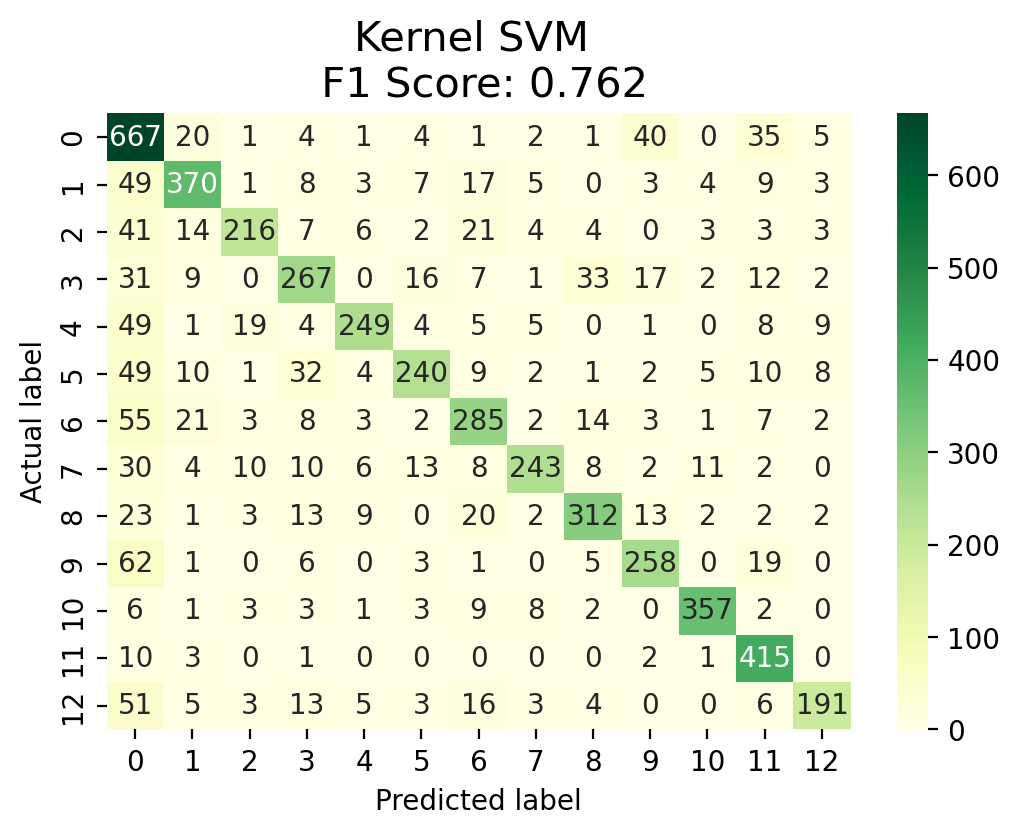

In [42]:
plt.figure(figsize=(6,4), dpi=200)
sns.heatmap(pd.DataFrame(confusion_matrix(y_true=y_tt, y_pred=y_pred_1)), annot=True, cmap="YlGn", fmt='g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Kernel SVM \n F1 Score: {0}'.format(round(score,3))
plt.title(all_sample_title, size = 15)